In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load the data into the data frame
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# No.of rows & columns
df.shape

(7043, 21)

In [4]:
#All the column names
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

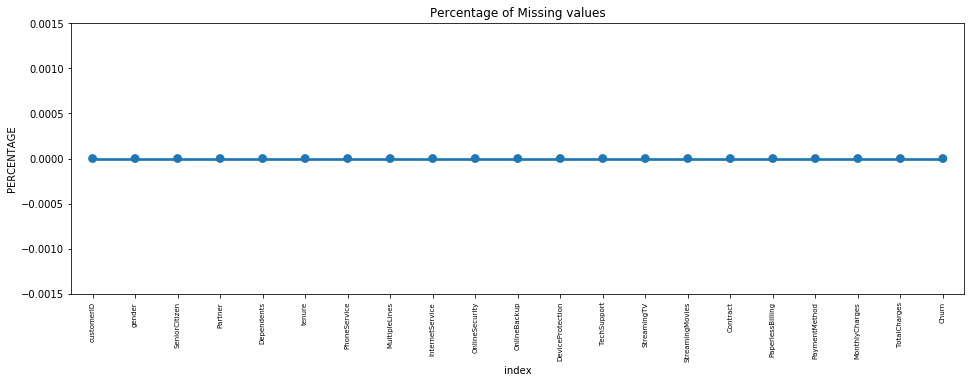

In [7]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [8]:
# dataset statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

- 75% customers have tenure less than 55 months

- Average Monthly charges are USD 64.76 whereas 25% customers pay more than $ 89.85 per month

In [9]:
# customer churn count
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

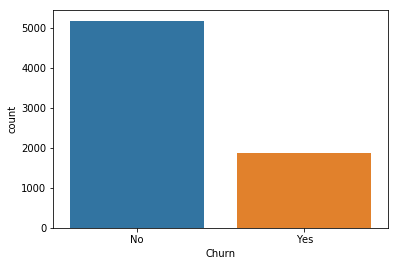

In [10]:
#Visualizing the customer churn count
sns.countplot(df['Churn'])

In [11]:
# Percentage of customers that stayed & left
num_retained = df[df['Churn']=='No'].shape[0]
num_churned = df[df['Churn']=='Yes'].shape[0]

In [12]:
#Percentage of customers that stayed
print(num_retained / (num_churned+num_retained) * 100, '% of customers stayed with the company')

73.4630129206304 % of customers stayed with the company


In [13]:
#Percentage of customers that left
print(num_churned / (num_churned+num_retained) * 100, '% of customers left the company')

26.536987079369588 % of customers left the company


- This is important information when evaluating the model to predict customer churn, because data is highly imbalanced, ratio = 73:27

In [14]:
df['TotalCharges'].dtypes

dtype('O')

In [15]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
df.loc[df['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- Since the percentage of missing values is very low compared to the dataset, we can drop them

In [17]:
#Removing missing values 
df.dropna(how = 'any', inplace = True)

#df.fillna(0)

##### Dividing the customers into bins based on tenure

In [18]:
df['tenure'].max()

72

In [19]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

In [20]:
# Grouping the tenure in bins of 12 months
df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

In [21]:
df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
49 - 60     832
25 - 36     832
37 - 48     762
Name: tenure_group, dtype: int64

In [22]:
#drop column customerID and tenure
df.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration

#### Univariate Analysis

- Plot distibution of individual predictors by churn

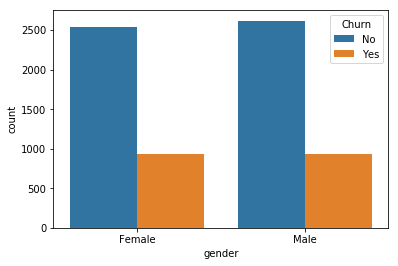

In [23]:
#Visualizing the churn count by gender
sns.countplot(x='gender', hue='Churn', data=df)

- From the plot above, it looks like gender does not play a role in customer churn.

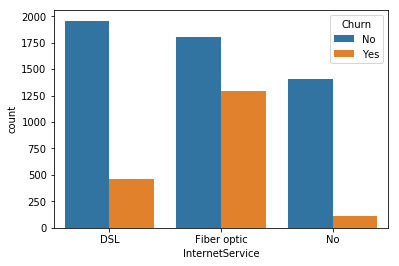

In [24]:
#Visualizing the churn count by InternetService
sns.countplot(x='InternetService', hue='Churn', data=df)

- The plot shows that most customers that retained had DSL internet service while those who churned had Fiber optic internet service. Maybe the company should only provide DSL as the internet service or stop providing Fiber optics.

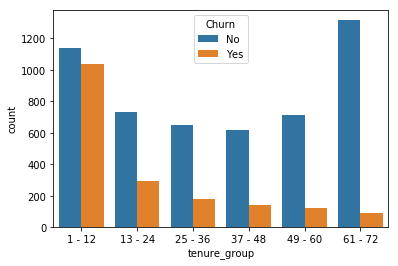

In [25]:
sns.countplot(x='tenure_group', hue='Churn', data=df)

- The tenure plot shows that most of the customers that churned were 1-24 months with the company, while most of the retained customers had a tenure between 25-72 months i.e, 2-6 years. So, it may be in the company's best interest to try to keep their customers for at least 2 years.

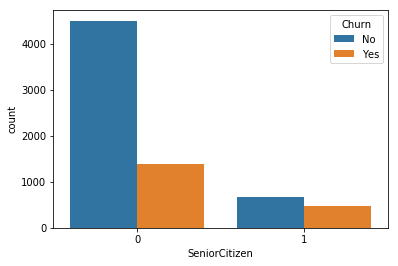

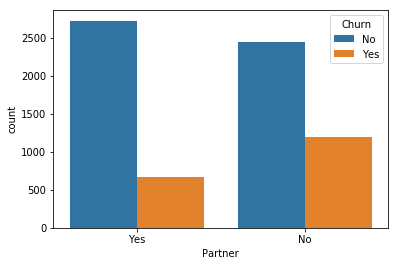

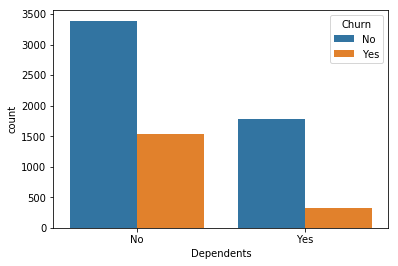

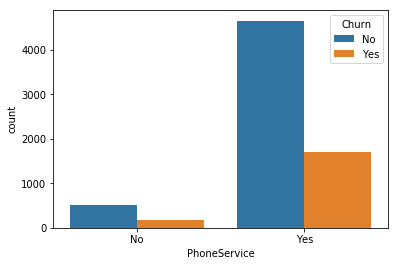

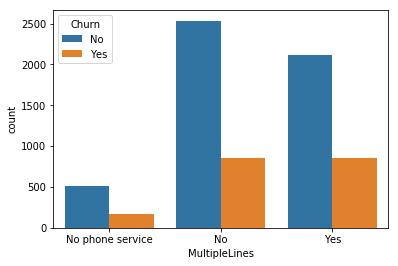

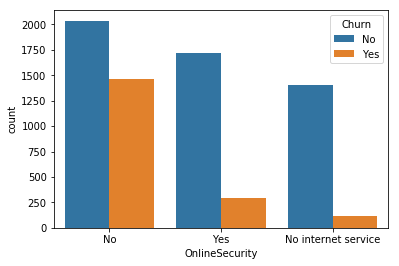

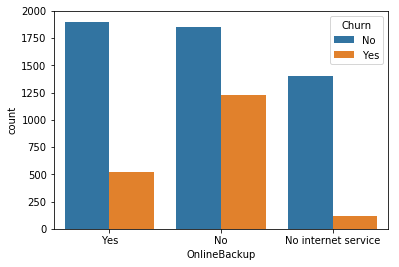

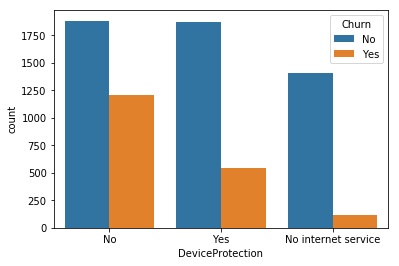

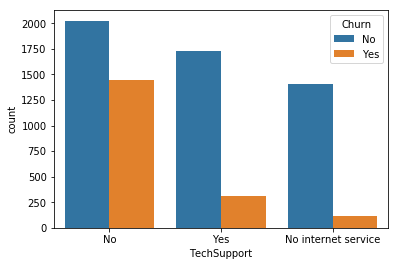

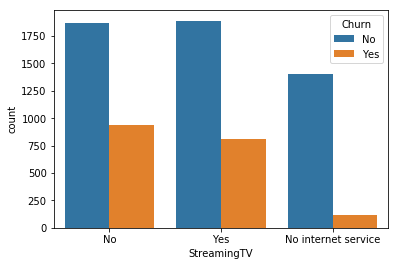

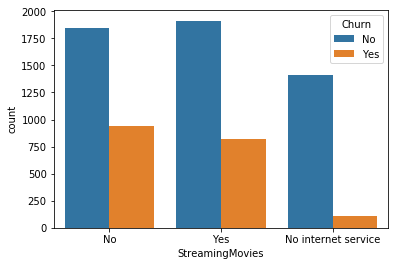

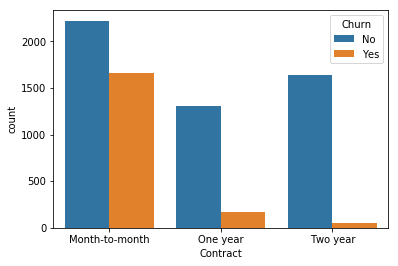

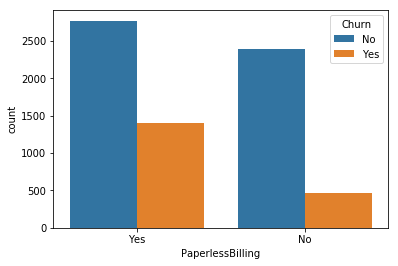

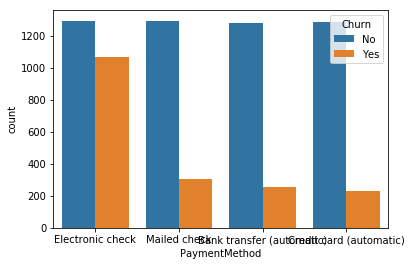

In [26]:
for i, predictor in enumerate(df.drop(columns=['gender', 'InternetService', 'Churn', 'TotalCharges', 'MonthlyCharges', 'tenure_group'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

- In the above plots, we see that if a customer is senior citizen, he is more likely to churn.
- If a customer is not having a partner/single, he is more likely to churn.
- If a customer has dependents, he is less likely to churn.Partners & Dependents are negatively correlated.
- People with phone service are more likely to churn
- Electronic check has highest churners whereas Credit card has lowest churners

In [27]:
# Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0
df['Churn'] = np.where(df.Churn == 'Yes',1,0)

In [28]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


- Converting all the categorical variables into dummy variables

In [29]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


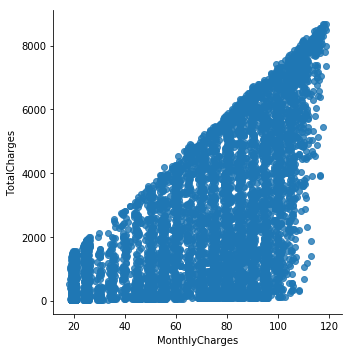

In [30]:
# Relationship between Monthly Charges and Total Charges
sns.lmplot(data=df_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Total Charges increase as Monthly Charges increase - as expected.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Monthly charges by churn')

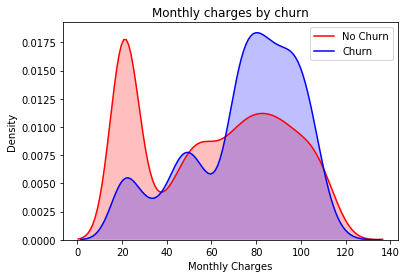

In [31]:
# Churn by Monthly Charges and Total Charges
plt = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 0) ], color="Red", shade = True)
plt = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 1) ], ax =plt, color="Blue", shade= True)
plt.legend(["No Churn","Churn"],loc='upper right')
plt.set_ylabel('Density')
plt.set_xlabel('Monthly Charges')
plt.set_title('Monthly charges by churn')

As Monthly Charges increase, Churn also increases.

#### Correlation

In [32]:
df_dummies.corr()['Churn']

SeniorCitizen                              0.150541
MonthlyCharges                             0.192858
TotalCharges                              -0.199484
Churn                                      1.000000
gender_Female                              0.008545
gender_Male                               -0.008545
Partner_No                                 0.149982
Partner_Yes                               -0.149982
Dependents_No                              0.163128
Dependents_Yes                            -0.163128
PhoneService_No                           -0.011691
PhoneService_Yes                           0.011691
MultipleLines_No                          -0.032654
MultipleLines_No phone service            -0.011691
MultipleLines_Yes                          0.040033
InternetService_DSL                       -0.124141
InternetService_Fiber optic                0.307463
InternetService_No                        -0.227578
OnlineSecurity_No                          0.342235
OnlineSecuri

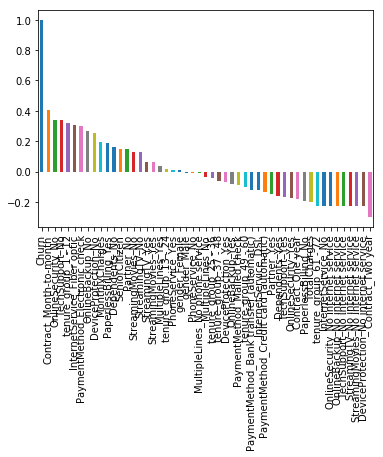

In [33]:
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

- High Churn is seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

- Low Churn is seens in case of Long term contracts, Subscriptions without internet service and customers with long tenure

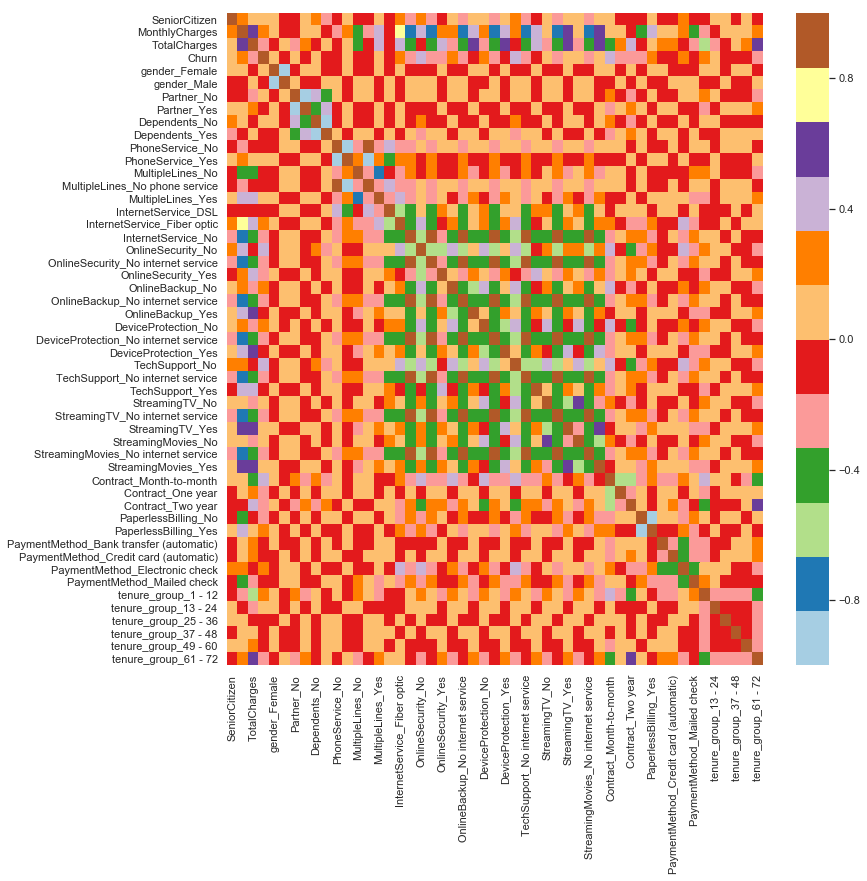

In [34]:
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(df_dummies.corr(), cmap="Paired")

#### Bivariate Analysis

In [35]:
df_target0=df.loc[df["Churn"]==0]
df_target1=df.loc[df["Churn"]==1]

Text(0.5,1,'Distribution of Gender for Churned Customers')

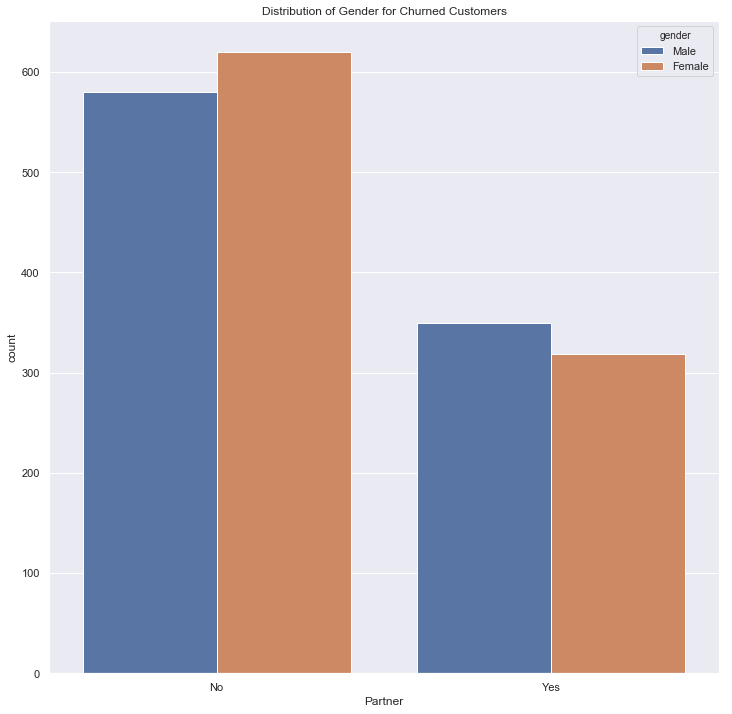

In [36]:
# Visualizing Gender of Churned Customers
sns.countplot(x='Partner', hue='gender', data=df_target1).set_title("Distribution of Gender for Churned Customers")

Text(0.5,1,'Distribution of Gender for Non-Churned Customers')

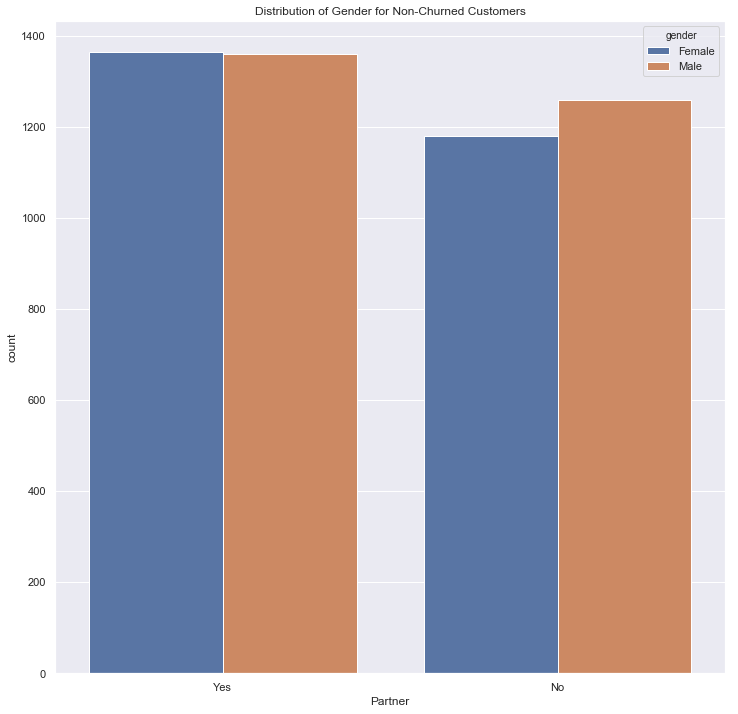

In [37]:
# Visualizing Gender of Non-Churned Customers
sns.countplot(x='Partner', hue='gender', data=df_target0).set_title("Distribution of Gender for Non-Churned Customers")

Text(0.5,1,'Distribution of PaymentMethod for Churned Customers')

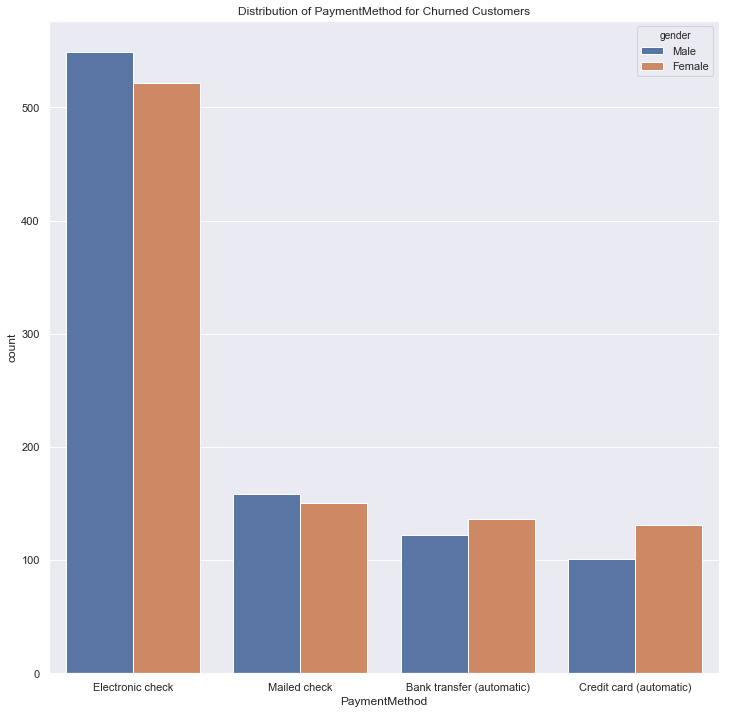

In [38]:
# Visualizing the PaymentMethod of Churned Customers
sns.countplot(x='PaymentMethod', hue='gender', order=df['PaymentMethod'].value_counts().index, 
              data=df_target1).set_title("Distribution of PaymentMethod for Churned Customers")

Text(0.5,1,'Distribution of Partner for Churned Customers')

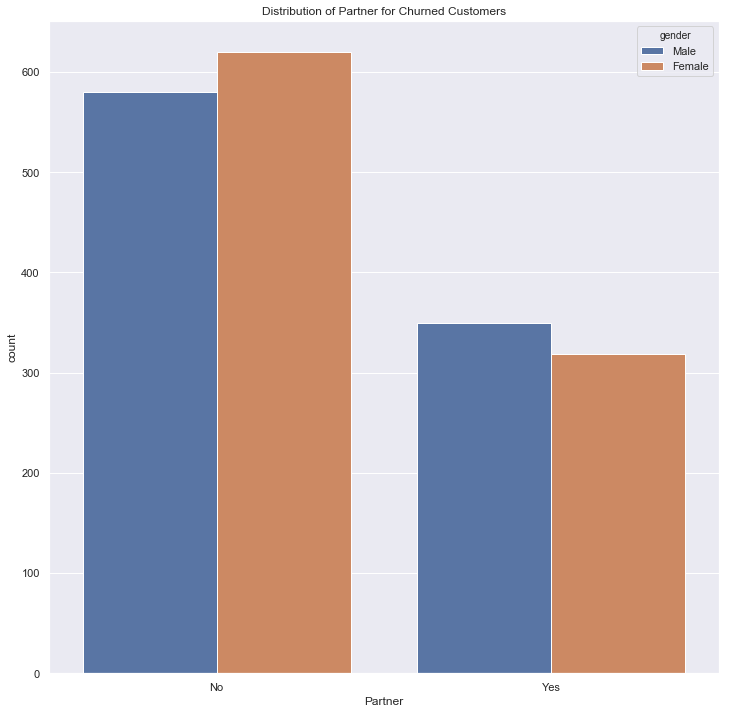

In [39]:
# Visualizing the PartnerDistribution of Churned Customers
sns.countplot(x='Partner', hue='gender', data=df_target1).set_title("Distribution of Partner for Churned Customers")

Text(0.5,1,'Distribution of Partner for Non-Churned Customers')

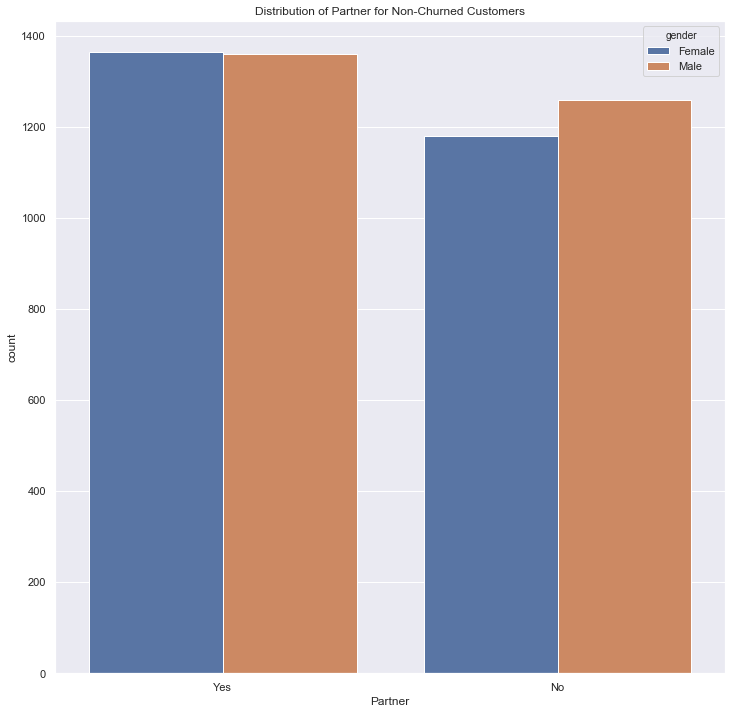

In [40]:
# Visualizing the PartnerDistribution of Non-Churned Customers
sns.countplot(x='Partner', hue='gender', data=df_target0).set_title("Distribution of Partner for Non-Churned Customers")

Text(0.5,1,'Distribution of InternetService for Non-Churned Customers based on Senior Citizen')

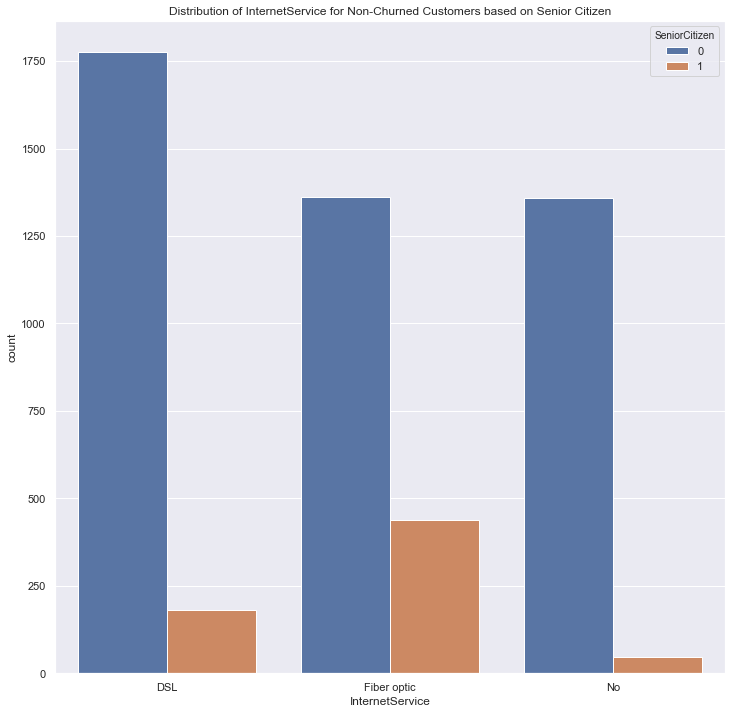

In [41]:
# Visualizing the InternetService of Non-Churned Customers
sns.countplot(x='InternetService', hue='SeniorCitizen', data=df_target0).set_title("Distribution of InternetService for Non-Churned Customers based on Senior Citizen")

In [42]:
#df_dummies.to_csv('telco_churn.csv')